In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
X, y = mnist.data, mnist.target
print(X.shape)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

(70000, 784)


In [14]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import roc_auc_score, accuracy_score

rfcl = RandomForestClassifier(n_estimators=200, random_state=42)

#Train and time fitting duration
tic = time.perf_counter()
rfcl.fit(X_train, y_train)
toc = time.perf_counter()
print("Training time:", toc-tic)

Training time: 91.58699850000039


In [15]:
score_100 = accuracy_score(y_test, rfcl.predict(X_test))
score_100

0.9707

In [16]:
# Reduce dataset dimensionality down to 95% variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(X_train)

In [17]:
from sklearn.base import clone
rfcl_95 = clone(rfcl)
#Train and time fitting duration
tic = time.perf_counter()
rfcl_95.fit(X_red, y_train)
toc = time.perf_counter()
print("Training time:", toc-tic)

Training time: 225.2480727000002


NameError: name 'x_test' is not defined

In [ ]:
score_95 = accuracy_score(y_test, rfcl_95.predict(X_test))
score_95

**10. t-SNE data vis in 2D**

In [5]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train)

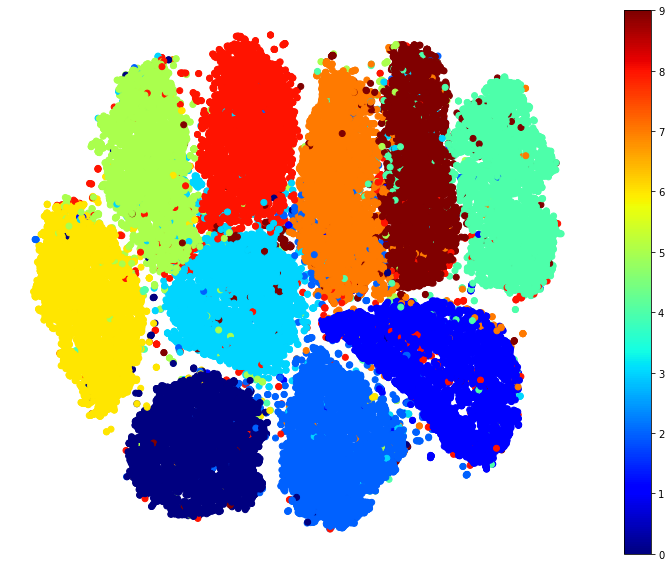

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train.astype(int), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()